In [147]:
import numpy as np   #Library for mathematical functions, such as square root.

import pandas as pd  #Library used for creating and manipulationg Dataframes.

import matplotlib.pyplot as plt  #Library for creating plots such as boxpllots and histograms.

import seaborn as sns  #Library for creating plots such as boxplots and histograms, but more aesthetically appealing than those found in pyplot
sns.set(color_codes = True)

from scipy import stats  #Library for calculating probability and statistics

import warnings
warnings.filterwarnings('ignore')  #Prevent warnings from appearing when cells are executed


In [148]:
path = "C:/Users/Dhanush Kenganauar/Downloads/Inferential_Business_Statistics_Project-main/Inferential_Business_Statistics_Project-main/AxisInsurance.csv"
data_insurance = pd.read_csv(path)

In [149]:
data_insurance.head()  #Let us look at first 4 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [150]:
#Make sure to copy the data to another dataframe to ensure the original data is not last.
#Now let's copy the data to another dataframe.
data1 = data_insurance[['age','sex','bmi','children','smoker','region','charges']].copy()
data1.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## <font color='dodgerblue'>Structure of the data</font>

In [151]:
data1.shape

(1338, 7)

## <font color='dodgerblue'>Memory Optimization:</font>

* <font color='grey'>Drop unnecessary columns whenever there are unnecessary columns for analysis</font>

* <font color='grey'>Convert object types to numeric or datetime datatypes where possiblity exists.</font>

* <font color='grey'>Downcast numeric data to the smallest appropriate bit size for reduction of memory.</font>

* <font color='grey'>Use the categorical datatype for columns where the number of unique values < rows / 2.</font>

In [152]:
data1.info(memory_usage="deep")                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.5 KB


#### <font color='red'>Memory usage = 286.5 KB</font>

In [157]:
data1 = data1.astype({'age':'int8','sex':'string','children':'int8','region':'category','smoker':'category'})
data1.info(memory_usage="deep")  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int8    
 1   sex       1338 non-null   string  
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int8    
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(2), float64(2), int8(2), string(1)
memory usage: 107.9 KB


#### <font color='red'>Memory usage = 108 KB.
<font color='grey'>Memory reduction by 62% </font>

In [158]:
data1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## <font color='red'>Questions?</font>

#### <font color='grey'>Yes, When we look at this data we will have many questions regarding how insurance amount varies and on what basis.</font>

#### <font color='grey'> Insurance companies need to have a strong understanding of their customers' charachteristics and how those charachteristics affect their medical claims. Answering below questions will provide insights into what type of customers are most likely to have higher charges.</font>

#### <font color='grey'> The above information will help in making business decesions for the leaders.</font> 

#### <font color='purple'>1. Are the medical claims made by the people who smoke greater than those who smoke greater than those who don't? </font>

#### <font color='purple'>2. Are the BMI's of females in the data set different than BMI's of males?</font>

#### <font color='purple'>3. Is the proportion of smokers significantly different across regions?</font>

#### <font color='purple'>4. Is the mean BMI of women with zero children, one child, or two children the same?</font>

#### <font color='grey'>Now let us do exploratory data analysis based on each of the questions above.</font>

***

## <font color='purple'>1. Are the medical claims made by the people who smoke greater than those who smoke greater than those who don't? </font>

##### <font color='grey'>EDA:</font>
<font color='grey'>Let us try to understand some statistics on smokers vs non-smokers</font>

* <font color='grey'>How many total customers do we have?</font>
* <font color='grey'>How many of our customers are smokers and non-smokers?</font>
* <font color='grey'>What is the total amount claimed by smokers and non-smokers?</font>
* <font color='grey'>What is the average amount claimed by smokers and non-smokers?</font>
* <font color='grey'>What is standard deviation of the amount claimed by smokers and non-smokers?</font>


In [115]:
count_customers = data1['smoker'].count()


#Smoker information
count_smokers = data1[data1['smoker']=='yes']['smoker'].count()
total_smoker_claims = data1[data1['smoker']=='yes']['charges'].sum()
mean_smoker_claims = data1[data1['smoker']=='yes']['charges'].mean()
std_smoker_claims = data1[data1['smoker']=='yes']['charges'].std()

print('Out of ', count_customers, 'customers, those who smoke are', count_smokers)
print('Average charges of a smoker is $', round(mean_smoker_claims, 2))
print('Total charges of all customers who smoke is $',total_smoker_claims)

Out of  1338 customers, those who smoke are 274
Average charges of a smoker is $ 32050.23
Total charges of all customers who smoke is $ 8781763.521839999


In [116]:
#Non-smoker information

count_non_smokers = data1[data1['smoker']=='no']['smoker'].count()
total_non_smoker_claims = data1[data1['smoker']=='no']['charges'].sum()
mean_non_smoker_claims = data1[data1['smoker']=='no']['charges'].mean()
std_non_smoker_claims = data1[data1['smoker']=='no']['charges'].std()

print('Out of ', count_customers, 'customers, those who do not smoke are', count_non_smokers)
print('Average charges of a Non-smoker is $', round(mean_non_smoker_claims, 2))
print('Total charges of all customers who do not smoke is $',round(total_non_smoker_claims,2))

Out of  1338 customers, those who do not smoke are 1064
Average charges of a Non-smoker is $ 8434.27
Total charges of all customers who do not smoke is $ 8974061.47


### <font color='dodgerblue'>Now let us visualize for the information that we have worked on</font>

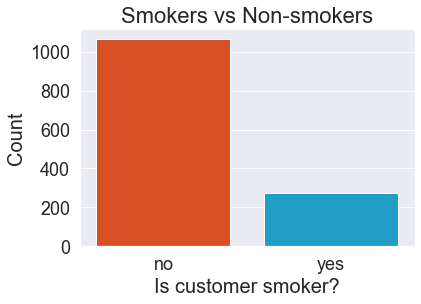

In [117]:
sns.countplot(data1['smoker'], palette=['#f44108', '#07ace1']).set_title('Smokers vs Non-smokers',fontsize=22)
plt.xticks(fontsize=18)
plt.xlabel('Is customer smoker?', fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=20)
plt.show()

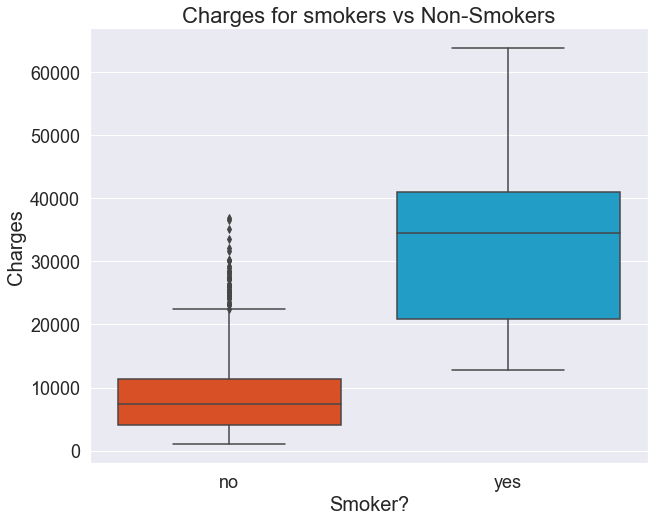

In [162]:
plt.figure(figsize=(10,8))
sns.boxplot(data1['smoker'],data1['charges'],palette=['#f44108', '#07ace1']).set_title('Charges for smokers vs Non-Smokers',fontsize=22)
plt.xticks(fontsize=18)
plt.xlabel('Smoker?', fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel('Charges', fontsize=20)
plt.show()


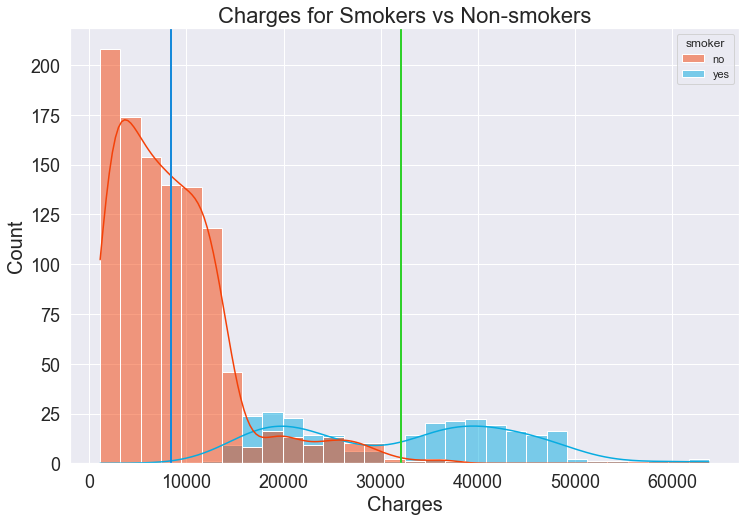

In [165]:
plt.figure(figsize=(12,8))
sns.histplot(data = data1, x='charges', hue='smoker', kde=True, palette=['#f44108', '#07ace1']).set_title('Charges for Smokers vs Non-smokers',fontsize=22)
plt.xticks(fontsize=18)
plt.xlabel('Charges', fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel('Count',fontsize=20)
plt.axvline(mean_smoker_claims,color='#2FD02A',linewidth=2)
plt.axvline(mean_non_smoker_claims,color='#1589DA',linewidth=2)
plt.show()


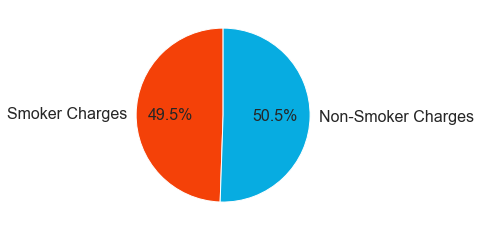

In [167]:
labels = 'Smoker Charges','Non-Smoker Charges'
sizes = [total_smoker_claims,total_non_smoker_claims]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#f44108', '#07ace1'], textprops={'fontsize': 16})
plt.show()

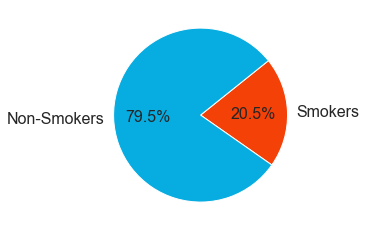

In [168]:
labels = 'Smokers','Non-Smokers'
sizes = [count_smokers,count_non_smokers]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=-35, colors=['#f44108', '#07ace1'], textprops={'fontsize': 16})
plt.show()

## <span style = "color:DodgerBlue"> Conclusions based on EDA </span>

#### • <font color='grey'>The data tells us that more of our customers are non-smokers than smokers.  
<font color='grey'>1,338 customers were analyzed.  274 customers smoke (20.5%) and 1,064 customers do not smoke (79.5%).  

#### • <font color='grey'>The data tells us that customers who smoke have higher charges than customers who do not smoke.  
<font color='grey'>75% of customers who smoke have claims of approximately \\$21,000 or more.  Whereas 75% of customers who <font color='grey'>do not smoke have claims of approximately \\$12,000 or less.  

#### • <font color='grey'>The data tells us that the average claim made by a smoker is higher than the average claim made by a non-smoker.
<font color='grey'>The mean charges of a smoker is \\$32,050.23.  The mean charges of a non-smoker is \\$8,434.27.

<font color='grey'>The descriptive statistics gathered above lead me to the conclusion that the claims filed by smokers are higher than those filed by non-smokers.

### <font color='grey'>Now let us use Hypothesis test for checking mean values.

<font color='grey'>Let µ$_1$ be the mean claim value of a smoker.

<font color='grey'>Let µ$_2$ be the mean claim value of a non-smoker.

<font color='grey'>Let α = 0.05


<font color='grey'>H$_0$ : µ$_1$ = µ$_2$

<font color='grey'>H$_a$ : µ$_1$ > µ$_2$

<font color='grey'>To calculate the p-value for this scenario, I will use t-test for equality of means.  This is because we have two samples that are independent of one another (smoker claims vs non-smoker claims).
Although the sample size is greater than 30, we do not know the population standard deviation, and therefore cannot use a z-test and instead must use a t-test.  This will be a one-tailed test because I am only testing if µ$_1$ is greater than µ$_2$.</font>



In [169]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(data1['charges'][data1['smoker']=='yes'], data1['charges'][data1['smoker']=='no'], equal_var = True, alternative = 'greater')
print(p_value)

4.135717921089551e-283


### <font color='dodgerblue'>Coclusions based on hypothesis test</font>

<font color='grey'>p-value is much smaller than significance level of 0.05. We can tell for sure that null hypothesis should be rejected, which tells us that claims of smokers is greater than the claims of non-smokers.</font>




## <font color='purple'>2. Are the BMI's of females in the data set different than BMI's of males?</font>

<font color='grey'>EDA:

<font color='grey'>Let us do some basic descriptive statistics about males and females and their BMIs

* <font color='grey'>How many total customers do we have?

* <font color='grey'>How many of those customers are male and female?

* <font color='grey'>What is the average BMI of males and females?

* <font color='grey'>What is the average amount claimed by males and females?

* <font color='grey'>What is the standard deviation of the amount claimed by customers in each BMI level?


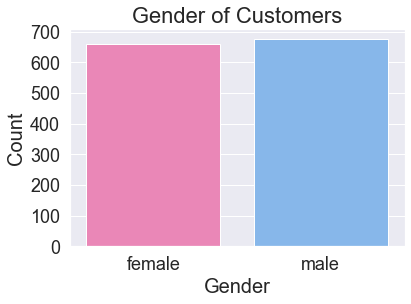

In [170]:
# This is a count plot which displays the number of male and female customers

sns.countplot(data1['sex'],palette=['#FB76B6', '#76B6FB']).set_title('Gender of Customers',fontsize=22)
plt.xticks(fontsize=18)
plt.xlabel('Gender',fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=20)
plt.show()

In [174]:
# Let us find summary of BMIs of males amd females 

data1.groupby(by=['sex'])['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


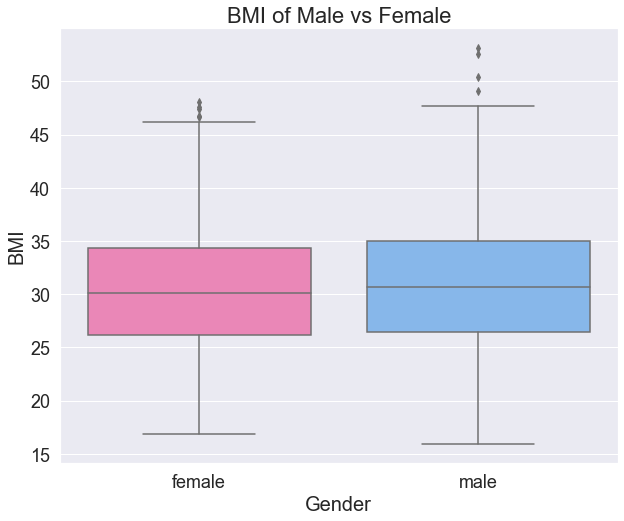

In [175]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data1['sex'], y=data1['bmi'],palette=['#FB76B6', '#76B6FB']).set_title('BMI of Male vs Female', fontsize=22)
plt.xlabel('Gender',fontsize=20)
plt.xticks(size=18)
plt.ylabel('BMI',fontsize=20)
plt.yticks(size=18)
plt.show()

In [206]:
bmi = data1['bmi']

bmi_brackets = [bmi<18.5, bmi<25, bmi<30,bmi>=30]
bmi_label = ['Underweight','healthy','overweight','obese']

data1['bmi_cat'] = np.select(bmi_brackets,bmi_label)

data1.groupby(by = ['bmi_cat'])['bmi_cat'].count()

bmi_cat
Underweight     20
healthy        225
obese          707
overweight     386
Name: bmi_cat, dtype: int64

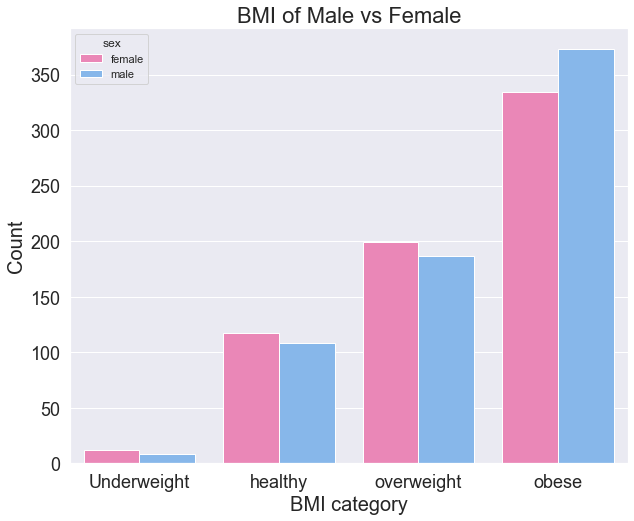

In [179]:
plt.figure(figsize=(10,8))
sns.countplot(x=data1['bmi_cat'], hue=data1['sex'],palette=['#FB76B6', '#76B6FB'], order=['Underweight','healthy','overweight','obese']).set_title('BMI of Male vs Female',fontsize=22)
plt.xlabel('BMI category', fontsize=20)
plt.xticks(size=18)
plt.ylabel('Count',fontsize=20)
plt.yticks(size=18)
plt.show()

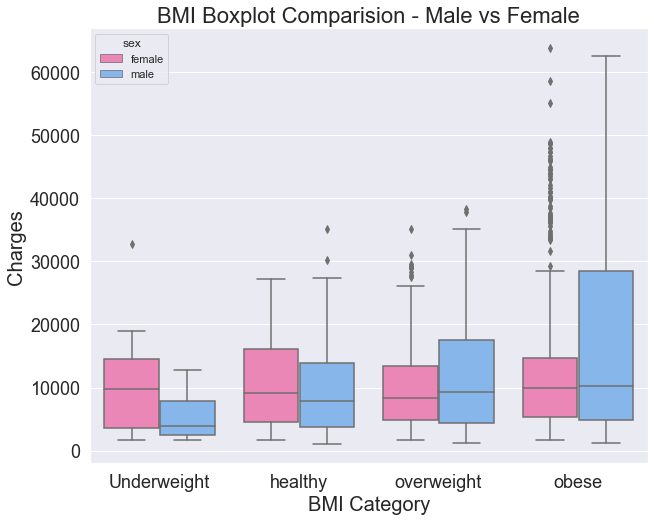

In [180]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data1['bmi_cat'], y=data1['charges'], hue=data1['sex'],palette=['#FB76B6', '#76B6FB'], order=['Underweight','healthy','overweight','obese']).set_title('BMI Boxplot Comparision - Male vs Female',fontsize=22)
plt.xlabel('BMI Category', fontsize=20)
plt.xticks(size=18)
plt.ylabel('Charges',fontsize=20)
plt.yticks(size=18)
plt.show()

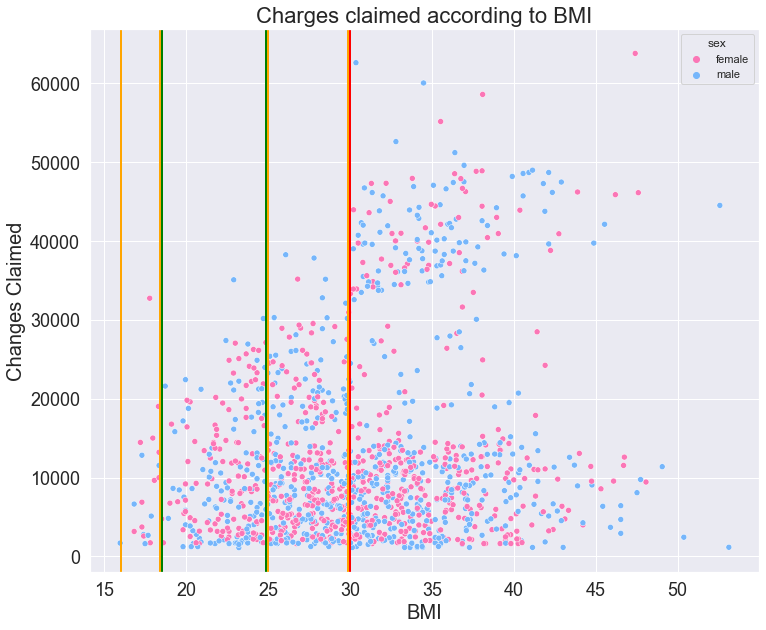

In [183]:
# Scatter plot shows the charges made by males and females.
# Vertical lines indicate the bmi index range which we have used to categorize them previously.

plt.figure(figsize=(12,10))
sns.scatterplot(data=data1, x='bmi',y='charges',hue='sex',palette=['#FB76B6', '#76B6FB']).set_title('Charges claimed according to BMI',fontsize=22)

plt.xlabel('BMI', fontsize=20)
plt.xticks(fontsize=18)
plt.ylabel('Changes Claimed', fontsize=20)
plt.yticks(fontsize=18)

plt.axvline(16, color='orange', linewidth=2) #underweight range
plt.axvline(18.4, color='orange',linewidth=2) #adjusted slightly for visualization enhancement

plt.axvline(18.5, color='green', linewidth=2) #healthy range
plt.axvline(24.85, color='green',linewidth=2) #adjusted slightly for visualization enhancement

plt.axvline(25, color='orange',linewidth=2) #overwieght
plt.axvline(29.85, color='orange', linewidth=2) #adjusted slightly for visualization enhancement

plt.axvline(30, color='red',linewidth=2) #obese

plt.show()

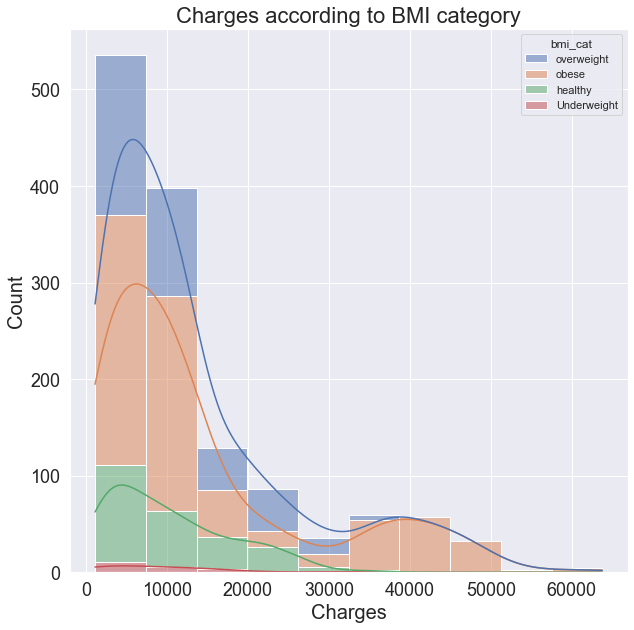

In [193]:
plt.figure(figsize=(10,10))
sns.histplot(data=data1, x='charges', hue='bmi_cat', bins=10, kde=True,multiple='stack').set_title('Charges according to BMI category',fontsize=22)
plt.xlabel('Charges', size=20)
plt.xticks(size=18)
plt.ylabel('Count',fontsize=20)
plt.yticks(size=18)
plt.show()
#Stacked Histogram plot

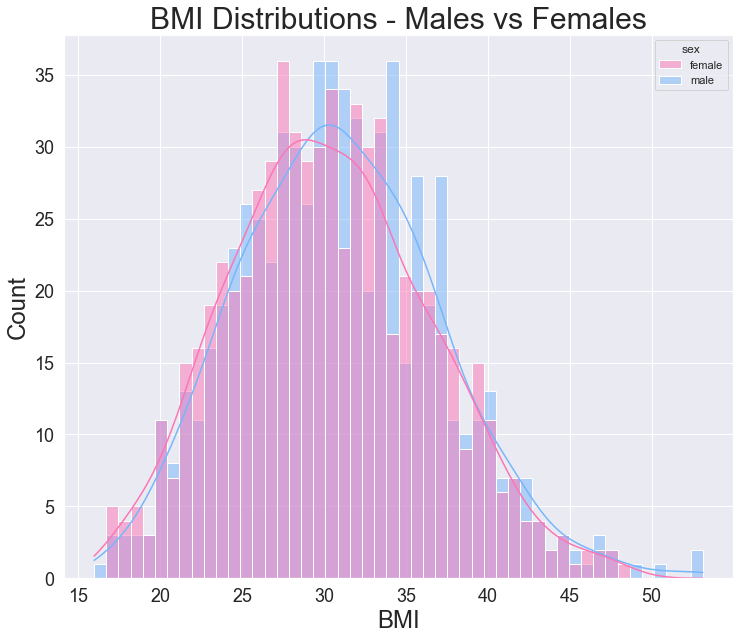

In [200]:
plt.figure(figsize=(12,10))
sns.histplot(data=data1, x='bmi', hue='sex', kde=True,bins=50, palette=['#FB76B6', '#76B6FB']).set_title('BMI Distributions - Males vs Females', fontsize=30)
plt.xlabel('BMI', size=24)
plt.xticks(size=18)
plt.ylabel('Count', size=24)
plt.yticks(size=18)
plt.show()

## <font color='dodgerblue'>Analysis of EDA

<font color='grey'>There are more females than males in the BMI categories of underweight, healthy, and overweight.

<font color='grey'>There are more males than females in the BMI category of obese.

<font color='grey'>The vast majority of customers with underweight, healthy, and overweight BMIs have charges less than $30,000. 

<font color='grey'>A few have charges between $30,000  and  $40,000. But none have charges greater than $40,000.

<font color='grey'>Most customers who are obese have charges less than $15,000.r</font>

<font color='grey'>However, a considerable number of obese customers have charges of $30,000 or more.

<font color='grey'>The mean BMI for males is 30.9. The mean BMI for females is 30.4.

<font color='grey'>The median BMI for males is 30.7. The median BMI for females is 30.1.

<font color='grey'>The minimum BMI for males is 16.0. The minimum BMI for females is 16.8.

<font color='grey'>The maximum BMI for males is 53.1. The maximum BMI for females is 48.1.

<font color='grey'>The IQR of BMIs for males is 8.6 (35.0 - 26.4). The IQR of BMIs for females is 8.2 (34.3 - 26.1).


<font color='grey'>:et us use hypothesis test to check mean values BMI male anf BMI female.
    
<font color='grey'>Let µ1 equal the mean BMI of a female.

<font color='grey'>Let µ2 equal the mean BMI of a male.

<font color='grey'>Let α = 0.05

<font color='grey'>H0: µ1 = µ2

<font color='grey'>H1: µ1 ≠ µ2

<font color='grey'>To calculate the p-value for this scenario, I will use a t-test for equality of means. This is because we have two samples that are independent of one another (female BMI vs male BMI).
Although the sample size is greater than 30, we do not know the population standard deviation, and therefore cannot use a z-test and instead must use a t-test. This will be a two-tailed test because I am testing if µ1 is not equal to µ2, not whether µ1 is greater/less than µ2.

In [207]:
from scipy.stats import ttest_ind

test_stat2, p_value2 = ttest_ind(data1['bmi'][data1['sex']=='female'],data1['bmi'][data1['sex']=='male'],equal_var = False, alternative = 'two-sided')
print(p_value2)

0.08992430667834876


### <font color='dodgerblue'>Conclusions from hypothesis test

<font color='grey'>The p-value of the test is approximately 0.09, which is greater than the predetermined level of significance of 0.05. Therefore, we fail to reject the null hypothesis. Which means that, statistically speaking, the BMI of males and females in this dataset are equal.

## <font color='purple'>3. Is the proportion of smokers significantly different across regions?</font>

<font color='grey'>EDA:

* <font color='grey'>How many total customers are there?

* <font color='grey'>How many of those customers live in each region?

* <font color='grey'>How many customers in each region smoke and how many do not?


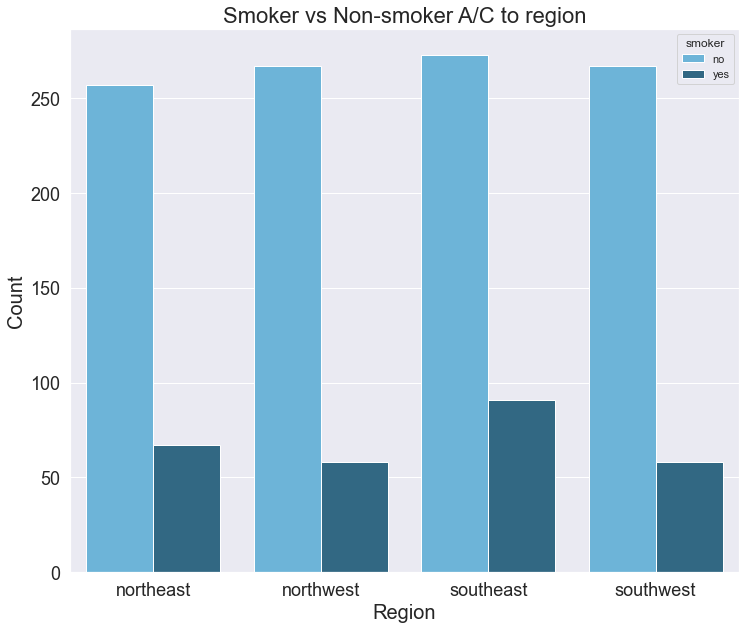

In [210]:
plt.figure(figsize=(12,10))
sns.countplot(data=data1, x='region', hue='smoker',palette=['#5BBAEA', '#256C90']).set_title('Smoker vs Non-smoker A/C to region',fontsize=22)
plt.xlabel('Region',fontsize=20)
plt.xticks(size=18)
plt.ylabel('Count',fontsize=20)
plt.yticks(size=18)
plt.show()

In [202]:
cont_table_margins = pd.crosstab(data1['region'],data1['smoker'],margins=True)
print(cont_table_margins)

smoker       no  yes   All
region                    
northeast   257   67   324
northwest   267   58   325
southeast   273   91   364
southwest   267   58   325
All        1064  274  1338


In [135]:
cont_table = pd.crosstab(data1['region'],data1['smoker'],margins=False)
print(cont_table)

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


## <span style = "color:dodgerblue"> Conclusions from EDA </span>

#### <font color='grey'>The data tells us that the proportion of smokers vs non-smokers in each region is similar.

• <font color='grey'>Northeast: 20.7% smoke, 79.3% do not smoke

• <font color='grey'>Northwest: 17.8% smoke, 82.2% do not smoke

• <font color='grey'>Southeast: 25.0% smoke, 75.0% do not smoke

• <font color='grey'>Southwest: 17.8% smoke, 82.2% do not smoke


### <font color='grey'>Now let us use hypothesis test.

<font color='grey'>Let α = 0.05

<font color='grey'>H$_0$ : Smoking preference is independent of region

<font color='grey'>H$_a$ : Smoking preference is not independent of region

<font color='grey'>To calculate the p-value for this scenario, I will use a chi-squared test for independence.  I can use this test because I am dealing with categorical variables (region and smoking preference), the number of observations for each variable is greater than five, and the data was randomly sampled.

In [203]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(cont_table)
print(p_value)

0.06171954839170541


## <span style = "color:dodgerblue"> Conclusions from hypothesis test </span>

<font color='grey'>The p-value is 0.06, which is greater than the predetermined level of significance of 0.05.  Therefore, we fail to reject the null hypothesis, meaning that smoking preference is independent of region.  This allows us to conclude that the proportion of smokers is not significantly different across regions.

## <font color='purple'>4. Is the mean BMI of women with zero children, one child, or two children the same?</font>

<font color='grey'>EDA:

• <font color='grey'>How many female customers have zero children? 1 child? 2 children? 3 or more children?

• <font color='grey'>How are the BMIs distributed amongst all women?

• <font color='grey'>How are the BMIs distributed amongst women with different numbers of children?


In [137]:
female = data1[data1['sex']=='female'].copy()
female.describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [138]:
kids = female['children']

cond_list_kids = [kids == 0, kids == 1, kids == 2, kids >= 3]
choice_list_kids = ['zero kids', 'one kid', 'two kids', 'three or more kids']

female['kid_cat'] = np.select(cond_list_kids, choice_list_kids)

female.groupby(by=['kid_cat'])['bmi'].describe()


,count,mean,std,min,25%,50%,75%,max
kid_cat,,,,,,,,
one kid,158.0,30.052658,5.786831,16.815,25.9825,29.5675,33.94250,46.09
three or more kids,96.0,30.624427,6.013468,18.300,26.6000,30.2100,34.15875,46.75
two kids,119.0,30.649790,6.628200,17.195,25.7700,31.3000,34.75000,48.07
zero kids,289.0,30.361522,5.966934,17.290,26.2000,29.9250,34.60000,47.41


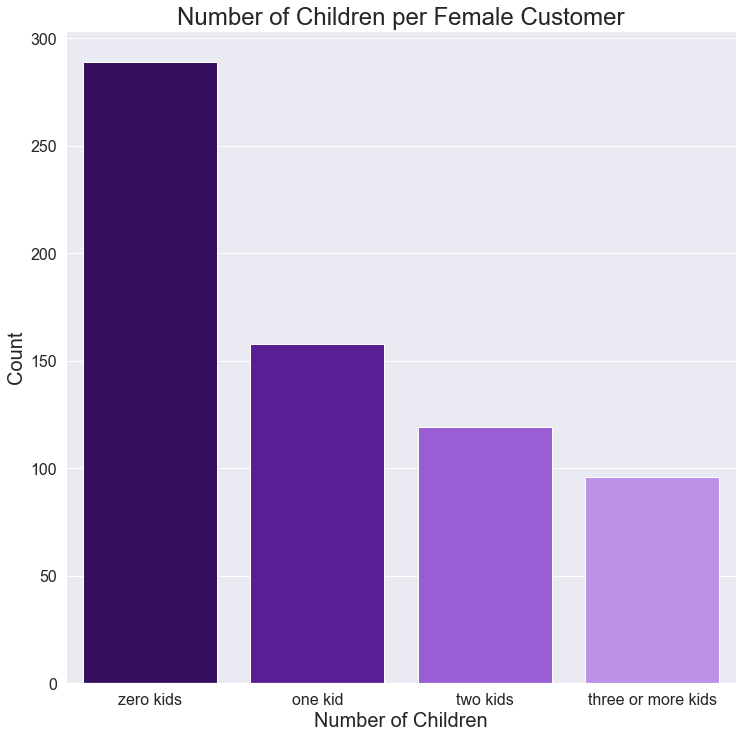

In [139]:
plt.figure(figsize=(12,12))
sns.countplot(female['kid_cat'], order=('zero kids', 'one kid', 'two kids', 'three or more kids'), palette=['#36026B', '#590BA7', '#9949E8', '#BC82F6']).set_title('Number of Children per Female Customer', fontsize=24)
plt.xlabel('Number of Children', size=20)
plt.xticks(size=16)
plt.ylabel('Count', size=20)
plt.yticks(size=16)
plt.show()

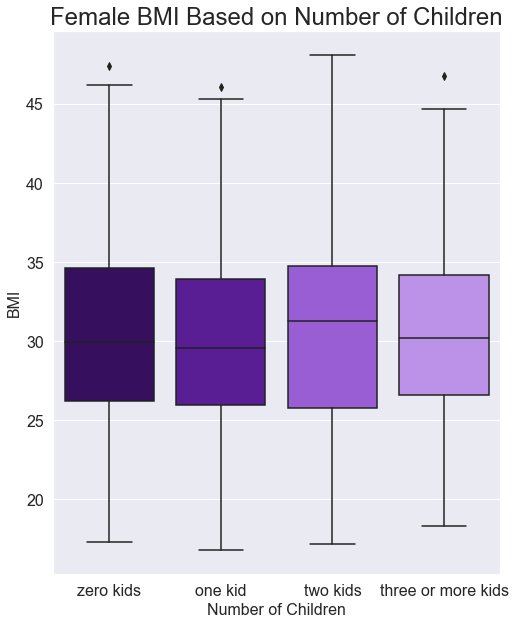

In [140]:
plt.figure(figsize=(8,10))
sns.boxplot(x=female['kid_cat'], y=female['bmi'], order=('zero kids', 'one kid', 'two kids', 'three or more kids'), palette=['#36026B', '#590BA7', '#9949E8', '#BC82F6']).set_title('Female BMI Based on Number of Children', fontsize = 24)
plt.xlabel('Number of Children', size=16)
plt.xticks(size=16)
plt.ylabel('BMI', size=16)
plt.yticks(size=16)
plt.show()

## <span style = "color:dodgerblue"> Conclusions from EDA </span>

### <font color='grey'>The data tells us that the mean BMI of women with 0, 1, 2, and 3+ children is very similar.

• <font color='grey'>43.7% of female customers have zero children (289 out of 662).  The average BMI of a woman with zero children is approximately 30.36.  The standard deviation is approximately 5.97.

• <font color='grey'>23.9% of female customers have one child (158 out of 662).  The average BMI of a woman with one child is approximately 30.05. The standard deviation is approximately 5.79

• <font color='grey'>17.9% of female customers have two children (119 out of 662).  The average BMI of a woman with two children is approximately 30.65. The standard deviation is approximately 6.63.

• <font color='grey'>14.5% of female customers have three or more children (96 out of 662).  The average BMI of a woman with three or more children is approximately 30.62. The standard deviation is approximately 6.01.


### <font color='grey'>Let us look at BMIs of women with children using a hypothesis test.

<font color='grey'>Let α = 0.05

<font color='grey'>Let μ$_0$ be the mean BMI of women with zero children.

<font color='grey'>Let μ$_1$ be the mean BMI of women with one child.

<font color='grey'>Let μ$_2$ be the mean BMI of women with two children.


<font color='grey'>H$_0$ : μ$_0$ =  μ$_1$ = μ$_2$

<font color='grey'>H$_a$ : At least one of the means listed in H$_0$ is not equal to the others.

<font color='grey'>To calculate the p-value for this scenario, I will use an ANOVA test because I am comparing three or more samples.  In order to use the ANOVA test, we must first use the Shapiro-Wilk Test to confirm that the data is normally distributed.  And then we must use the Levene Test to confirm the variances are equal.

### <font color='dodgerblue'>Shapiro-Wilk Test

<font color='grey'>H$_0$ : The mean BMIs of women with zero, one, two, (or three+) children are normally distributed

<font color='grey'>H$_a$ : The mean BMIs of women with zero, one, two, (or three+) children are not normally distributed

In [141]:
w, p_value = stats.shapiro(female['bmi'])
print(p_value)

0.0035433683078736067


<font color='grey'>p_value of 0.0035 is less than the level of significance of 0.05. Therefore, we should reject the null hypothesis and conclude that the mean BMIs of women with zero, one, two, or three+ children is not normally distributed. However, that would mean that the ANOVA test cannot be used.

<font color='grey'>"The <font color = 'red'>Shapiro-Wilk test</font> is rarely used to detect normality since graphical representations are so much more useful. Furthermore, the Shapiro-Wilk test is <font color = 'red'>SENSITIVE</font> to sample size. For small samples, even big departures from normality are not detected while for large samples small deviations from normality will lead to the null hypothesis being rejected."
    
<font color='grey'>I also found that a QQ plot or a probplot can be used to determine if a dataset is normally distributed. The closer to linear the data is, the more normal it is. So I made these plots as well, and with an R-squared value of .9940, it is very close to perfectly linear, which I believe is more evidence that the data is normally distributed, despite what the Shapiro-Wilk test said.

<font color='grey'>The histogram shown below demonstrates that visually this data is normal as it follows the traditional bell-shape. Therefore, I will assume that this is a normal distribution and continue with the ANOVA test.

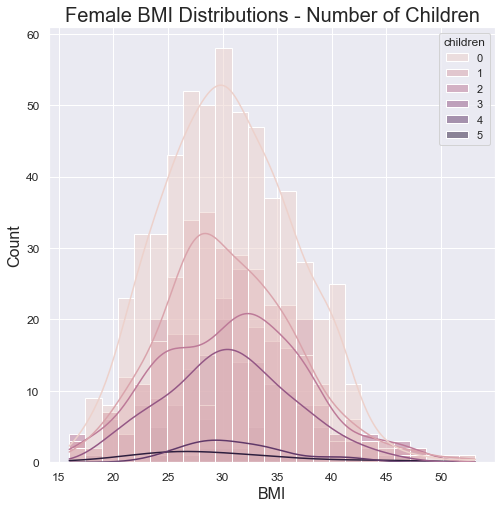

In [211]:
plt.figure(figsize=(8,8))
sns.histplot(data=data1, x='bmi', hue='children', kde=True).set_title('Female BMI Distributions - Number of Children', fontsize=20)
plt.xlabel('BMI', size=16)
plt.xticks(size=12)
plt.ylabel('Count', size=16)
plt.yticks(size=12)
plt.show()

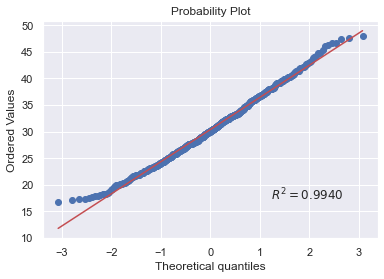

In [212]:
stats.probplot(female['bmi'], plot= plt, rvalue= True)
plt.show()

### <font color='dodgerblue'>Levene Test

<font color='grey'>H$_0$ : The BMI variances of women with zero, one, two, (or three+) children are equal

<font color='grey'>H$_a$ : The BMI variances of women with zero, one, two, (or three+) children are not equal

In [213]:
statistic, p_value = stats.levene(female['bmi'][female['children']==0], female['bmi'][female['children']==1], female['bmi'][female['children']==2], female['bmi'][female['children']>2])
print(p_value)

0.5871535029660999


<font color='grey'>p_value of 0.587 is greater than the level of significance of 0.05. Therefore, we fail to reject the null hypothesis and conclude that the variances of women with zero, one, two, or three+ children are equal.

In [214]:
## ANOVA Test

test_stat, p_value = stats.f_oneway(female['bmi'][female['children']==0], female['bmi'][female['children']==1], female['bmi'][female['children']==2])
print(p_value)

0.7158579926754841


In [146]:
# ANOVA test according to my curiosity: comparing 0 vs 1 vs 2 vs 3+ children

test_stat, p_value = stats.f_oneway(female['bmi'][female['children']==0], female['bmi'][female['children']==1], female['bmi'][female['children']==2], female['bmi'][female['children']>2])
print(p_value)

0.8358106159404568


## <span style = "color:dodgerblue"> Conclusions from hypothesis test </span>

<font color='grey'>The p-values of 0.72 or 0.84 are greater than the predetermined level of signficance of 0.05.  Therefore, we fail to reject the null hypothesis and we conclude that the mean BMIs of women with zero, one, two, (or three+) children are statistically equal.